In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [35]:
data=pd.read_csv('Purchase_new.csv')


In [36]:
data.head()

,Holiday,Discount,Free Delivery,Purchase
0,No,Yes,Yes,Yes
1,No,Yes,Yes,Yes
2,No,No,No,No
3,yes,Yes,Yes,Yes
4,yes,Yes,Yes,Yes


In [37]:
data.tail()

,Holiday,Discount,Free Delivery,Purchase
25,No,No,Yes,No
26,No,Yes,Yes,Yes
27,No,Yes,Yes,Yes
28,yes,Yes,Yes,Yes
29,yes,Yes,Yes,Yes


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Holiday        30 non-null     object
 1   Discount       30 non-null     object
 2   Free Delivery  30 non-null     object
 3   Purchase       30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [44]:
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])


In [45]:
X = data[['Holiday', 'Discount', 'Free Delivery']]
y = data['Purchase']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [47]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
y_pred = clf.predict(X_test)
print("Predictions:", y_pred)


Predictions: [1 1 1 1 1 1]


In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[6]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


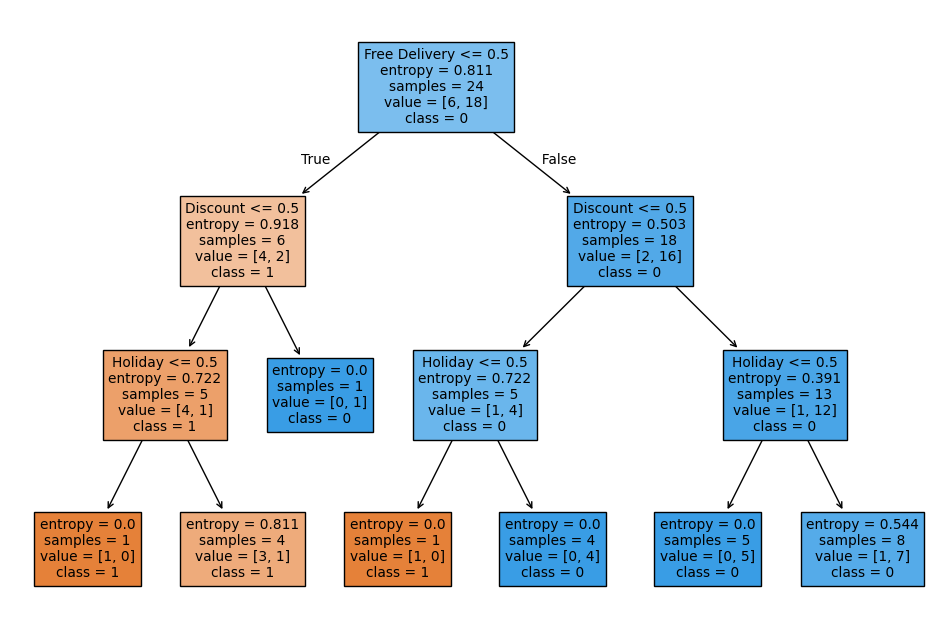

In [52]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True)
plt.show()
